<a href="https://colab.research.google.com/github/die666666/Image_processing_filters/blob/main/iit_intern_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
import cv2

def process_image(img):
    # Convert to LAB color space and apply CLAHE
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab_planes = list(cv2.split(lab_img))  # Convert tuple to list
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    lab_planes[0] = clahe.apply(lab_planes[0])  # Modify the list element
    lab_img = cv2.merge(lab_planes)  # Merge the modified list back to tuple

    # Convert to HSV color space and adjust saturation and value
    hsv_img = cv2.cvtColor(cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR), cv2.COLOR_BGR2HSV)
    hsv_img[..., 1] = cv2.addWeighted(hsv_img[..., 1], 1.2, 0, 0, 0)
    hsv_img[..., 2] = cv2.addWeighted(hsv_img[..., 2], 1.1, 0, 0, 0)

    # Apply bilateral filter
    bilateral_img = cv2.bilateralFilter(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR), 9, 75, 75)

    return bilateral_img

# Example usage
# img = cv2.imread('your_image_path.jpg')
# processed_img = process_image(img)
# cv2.imshow('Processed Image', processed_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
uploaded = files.upload()


Saving indoor.jpeg to indoor (4).jpeg
Saving outdoor.jpeg to outdoor (4).jpeg


In [ ]:
image1_path = list(uploaded.keys())[0]
image2_path = list(uploaded.keys())[1]

img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)


In [ ]:
processed_img2 = process_image(img2)



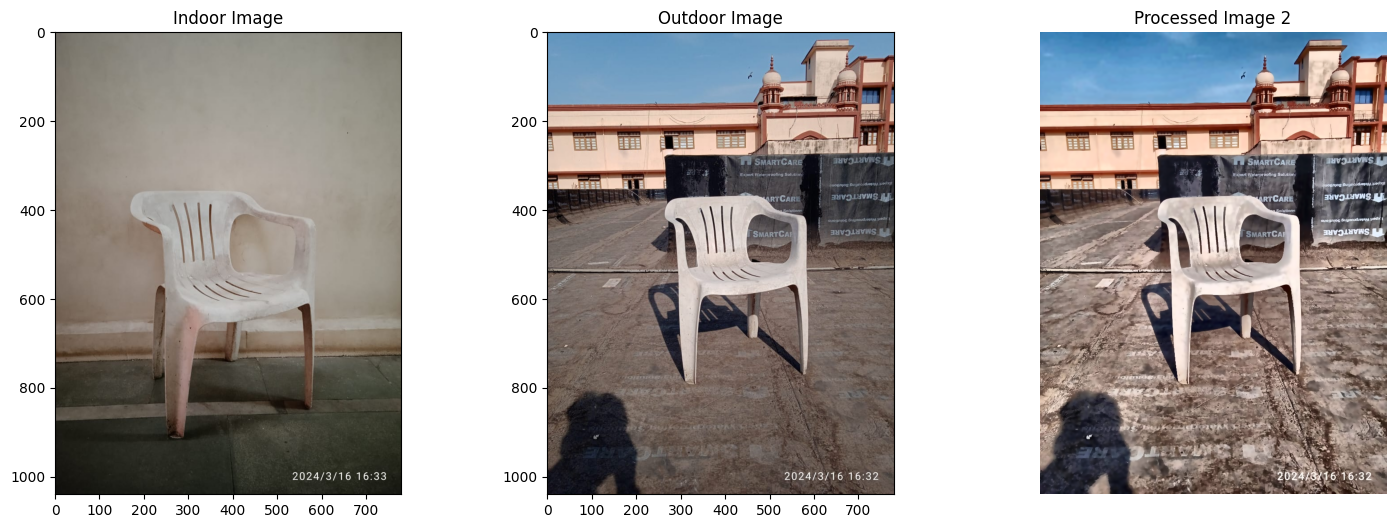

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display original Image 1
axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Indoor Image')
axes[0].axis('on')

# Display original Image 2
axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Outdoor Image')
axes[1].axis('on')

# Display processed Image 2
axes[2].imshow(cv2.cvtColor(processed_img2, cv2.COLOR_BGR2RGB))
axes[2].set_title('Processed Image 2')
axes[2].axis('off')

plt.show()
